In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [16]:
import matplotlib as plt
import keras
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten
from keras.models import Sequential
from keras.preprocessing import image
import os
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping # Early Stopping
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import img_to_array
import easygui

In [17]:
base_dir = "./dataset"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training pictures
train_normal_dir = os.path.join(train_dir, 'normal')
train_autism_dir = os.path.join(train_dir, 'autism')

# Directory with our validation pictures
validation_normal_dir = os.path.join(validation_dir, 'normal')
validation_autism_dir = os.path.join(validation_dir, 'autism')

In [18]:
train_normal_fnames = os.listdir( train_normal_dir )
train_autism_fnames = os.listdir( train_autism_dir )

print(train_normal_fnames[:10])
print(train_autism_fnames[:10])

['.ipynb_checkpoints', 'Amer_Normal_5_5_2011S001R01.dat', 'Amer_Normal_5_5_2011S001R02.dat', 'Amer_Normal_5_5_2011S001R03.dat', 'Dhelal_Normal_15_6_2011S001R01.dat', 'Dhelal_Normal_15_6_2011S001R02.dat', 'Mahmud_Normal_5_5_2011S001R01.dat', 'Mahmud_Normal_5_5_2011S001R02.dat', 'Majdolin_Normal_18_5_2011S001R01.dat', 'Omran_Normal_5_5_2011S001R01.dat']
['.ipynb_checkpoints', 'Bader_Autism_24_11_2011S001R01.dat', 'Bader_Autism_24_11_2011S001R05.dat', 'Bader_Autism_24_11_2011S001R07.dat', 'Bader_Autism_24_11_2011S001R08.dat', 'Bader_Autism_24_11_2011S001R09.dat', 'Bader_Autism_24_11_2011S001R10.dat', 'Deena_Autism_23_4_2011S001R01.dat', 'Duaa_Autism_23_4_2011S001R01.dat', 'Mada_Autism_26_5_2011S001R01.dat']


In [19]:
print('total training Normal data :', len(os.listdir( train_normal_dir ) ))
print('total training autism data :', len(os.listdir( train_autism_dir ) ))

print('total validation Normal data :', len(os.listdir( validation_normal_dir ) ))
print('total validation autism data :', len(os.listdir( train_autism_dir ) ))

total training Normal data : 10
total training autism data : 19
total validation Normal data : 6
total validation autism data : 19


In [20]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

In [30]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Dense(1000,input_shape=(16, 500),activation='relu'),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.50),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16, 1000)          501000    
                                                                 
 flatten_3 (Flatten)         (None, 16000)             0         
                                                                 
 dense_7 (Dense)             (None, 64)                1024064   
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,525,129
Trainable params: 1,525,129
Non-trainable params: 0
_________________________________________________________________


In [32]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Apply data augmentation
train_datagen = tf.signal.fft2d(my_signals, name=None)

validation_datagen = ImageDataGenerator(rescale=1./255,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(16, 500),  # All images will be resized to 150x150
        batch_size=64,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,  # This is the source directory for training images
        target_size=(16, 500),  # All images will be resized to 150x150
        batch_size=64,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

NameError: name 'my_signals' is not defined

In [35]:
# Constant for epochs
EPOCHS = 50
early_stop = EarlyStopping(monitor='val_loss', patience=3)
# Train the model
history = model.fit(
      train_generator,
      epochs=EPOCHS,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=2)

ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [36]:
pd.DataFrame(model.history.history).plot()

AttributeError: 'NoneType' object has no attribute 'history'

In [15]:
test_accu = model.evaluate(train_generator)
print('The testing accuracy is :',test_accu[1]*100, '%')

11/11 [==============================] - 69s 6s/step - loss: 0.1904 - accuracy: 0.9246
The testing accuracy is : 92.45561957359314 %


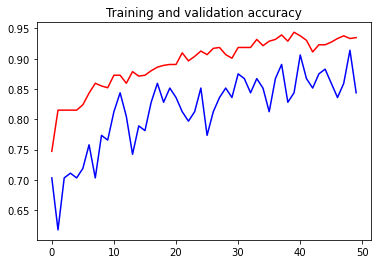

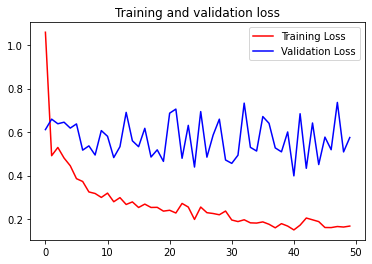

In [16]:
# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
export_dir = 'saved_model'

# Use the tf.saved_model API to save your model in the SavedModel format
tf.saved_model.save(model, export_dir = export_dir)

INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets


In [20]:
# Select mode of optimization
mode = "Speed" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [21]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

7046756

In [22]:
model.save('trained_model','/model_save_path')
model.save('trained_model.h5')
print(' Model saved ')

INFO:tensorflow:Assets written to: sales forcasting\assets


INFO:tensorflow:Assets written to: sales forcasting\assets


 Model saved 


1/1 [==============================] - 0s 73ms/step
[0.5817736]
its Covid


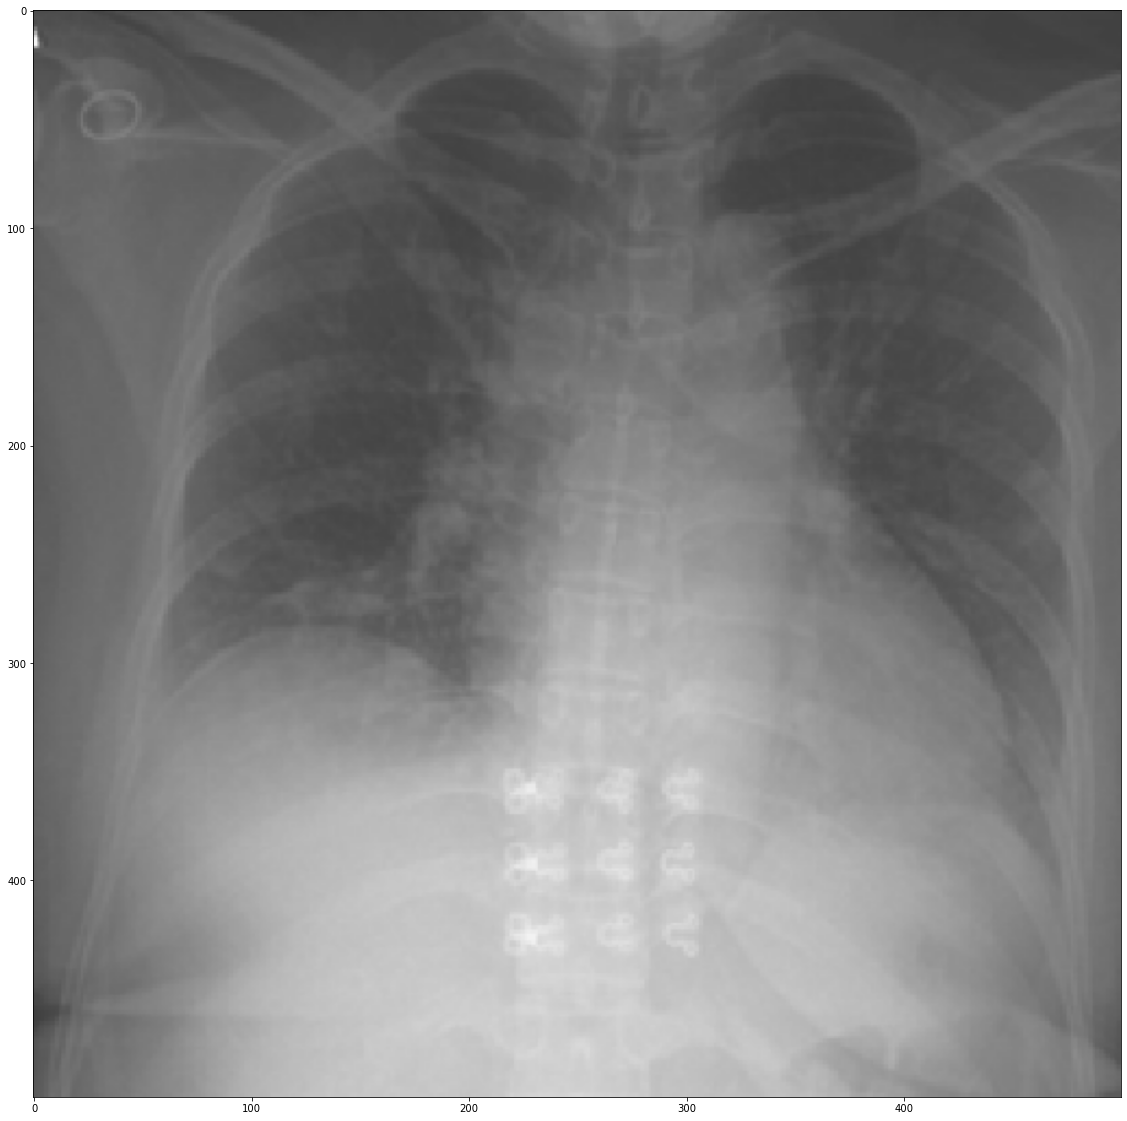

In [50]:
from tensorflow.keras.utils import img_to_array
file = './cov.png'

img = tf.keras.utils.load_img(file, target_size=(500,500))

plt.figure(figsize = (20,20))
plt.imshow(img)
x = img_to_array(img)
x /= 255
img_test = np.expand_dims(x, axis=0)

classes = model.predict(img_test, batch_size=10)
print(classes[0])
if classes[0]<0.5:
    print("its Normal")
else:
    print("its Covid")